In [39]:
import tensorflow as tf

In [40]:
mnist = tf.keras.datasets.mnist

In [41]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [42]:
x_train.shape

(60000, 28, 28)

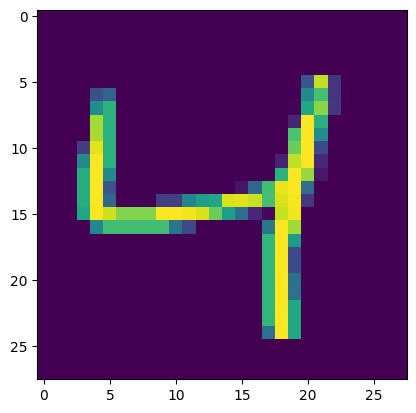

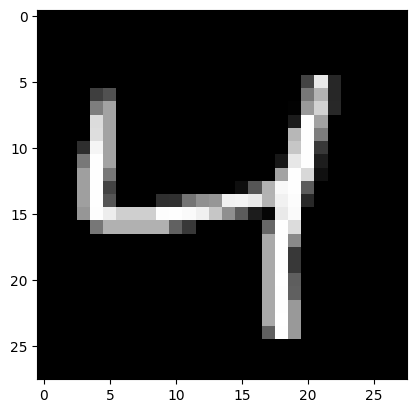

In [43]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.show()
plt.imshow(x_train[2], cmap = plt.cm.gray)

In [44]:
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

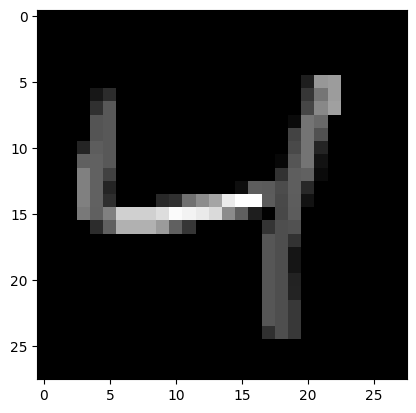

In [45]:
x_train = tf.keras.utils.normalize(x_train,axis =1)
x_test = tf.keras.utils.normalize(x_test,axis= 1)
plt.imshow(x_train[2] , cmap = plt.cm.gray)

In [47]:
print(x_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [48]:
print(y_train[2])

4


In [49]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE, 1)
print("Training Samples dmension",x_trainr.shape)
print("Testing Samples dmension",x_testr.shape)

Training Samples dmension (60000, 28, 28, 1)
Testing Samples dmension (10000, 28, 28, 1)


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [51]:
model = Sequential()
model. add(Conv2D(64,(3,3), input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))

model. add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))

model. add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
print("Total Training Samples = ", len(x_trainr))


Total Training Samples =  60000


In [54]:
model.compile(loss = "sparse_categorical_crossentropy" , optimizer ="adam" , metrics = ['accuracy'])

In [55]:
model.fit(x_trainr, y_train,epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9024 - loss: 0.3091 - val_accuracy: 0.9651 - val_loss: 0.1169
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.9680 - loss: 0.1033 - val_accuracy: 0.9714 - val_loss: 0.0990
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9773 - loss: 0.0734 - val_accuracy: 0.9662 - val_loss: 0.1129
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.9819 - loss: 0.0592 - val_accuracy: 0.9757 - val_loss: 0.0755
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.9852 - loss: 0.0472 - val_accuracy: 0.9826 - val_loss: 0.0617


In [56]:
test_loss,test_acc= model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9826 - loss: 0.0602
Test Loss on 10,000 test samples 0.06023869663476944
Validation Accuracy on 10,000 test samples 0.9825999736785889


In [57]:
predictions = model.predict([x_testr])

  7/313 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step    

C:\Users\gulsh\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_137
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step 


C:\Users\gulsh\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_137
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [58]:
print(predictions)

[[7.5947004e-10 7.8136236e-07 2.5159645e-08 ... 9.9999571e-01
  3.5958629e-09 2.7215899e-06]
 [6.5280774e-06 4.2025013e-06 9.9998736e-01 ... 5.0275082e-07
  9.4788364e-09 1.1560584e-08]
 [2.9652401e-06 9.9993348e-01 8.2576713e-07 ... 1.2673923e-06
  1.7720666e-06 1.7267876e-06]
 ...
 [3.3367620e-10 5.4800729e-08 1.5212120e-09 ... 1.8624148e-06
  1.2323143e-06 1.4673929e-05]
 [1.9433121e-06 4.5756326e-11 1.2495343e-12 ... 2.6128391e-13
  1.7590919e-06 2.0037703e-08]
 [2.7526354e-05 2.7192004e-06 4.2896951e-04 ... 2.7913285e-09
  3.4195440e-05 8.8151164e-06]]


In [59]:
print(np.argmax(predictions[0]))

7


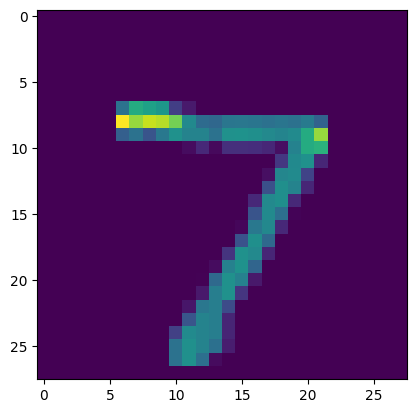

In [60]:
plt.imshow(x_test[0])

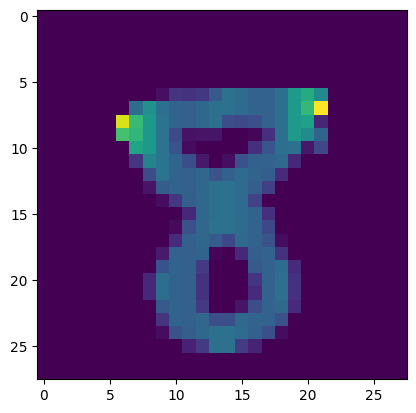

In [61]:
 plt.imshow(x_test[128])

In [62]:
import cv2

In [63]:
img = cv2.imread('eight.png')

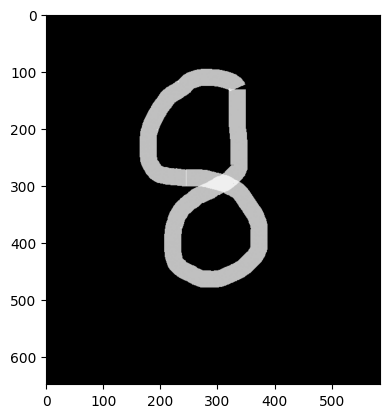

In [64]:
plt.imshow(img)

In [65]:
img.shape

(648, 585, 3)

In [66]:
gray  = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [67]:
gray.shape

(648, 585)

In [68]:
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [69]:
resized.shape

(28, 28)

In [70]:
newimg = tf.keras.utils.normalize(resized, axis = 1)

In [71]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [72]:
newimg.shape

(1, 28, 28, 1)

In [73]:
predictions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


In [74]:
print(np.argmax(predictions))

8


In [ ]:
import tensorflow as tf
import cv2
import numpy as np
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN


cap = cv2.VideoCapture("Recording 2025-10-30 211146.mp4")
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")

text = "some text in a box!"
(text_width , text_height) = cv2.getTextSize(text, font,fontScale = font_scale, thickness = 1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x,text_offset_y),(text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cntr = 0
while True:
    ret, frame = cap.read()
    cntr += 1
    if (cntr % 2) == 0:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
        newimg = resized / 255.0
        newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        predictions = model.predict(newimg)
        status = np.argmax(predictions)
        print(status)
        print(type(status))

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status.astype(str) , (x1+int(w1/5), y1+ int(h1/2)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.imshow("Video", frame)
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1
<class 'numpy.int64'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1
<class 'numpy.int64'>
1/1 ━━